# Setup

In [ ]:
# Master Notebook containing everything

In [ ]:
# setting up the GPU devices used by this notebook
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "0,1,2,3,4,5,6,7"

import torch
print(torch.cuda.device_count())

8


# Data Analysis

In [ ]:
import anndata
import scanpy as sc
import matplotlib.pyplot as plt

In [ ]:
# Select the correct dataset
adata = anndata.read_h5ad('/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/scRNA_dataset/Previous_datasets/BATIUK_SCZ.h5ad')

In [ ]:
adata.obs

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.3,seurat_clusters,cellType,condition,cellTypeL2,n_counts
MB7_AAACCCAAGATGTTAG-1,MB7,17800.0,5160,0.573034,4,4,SST,Ctrl,GABA neurons,17800.0
MB7_AAACCCAAGCAGCCCT-1,MB7,24198.0,6842,0.115712,2,2,L2_3_CUX2_FREM3,Ctrl,GLUT neurons,24198.0
MB7_AAACCCAAGTAAGACT-1,MB7,7852.0,3666,1.604687,1,1,VIP,Ctrl,GABA neurons,7852.0
MB7_AAACCCAAGTCTAGAA-1,MB7,9891.0,4104,0.859367,6,6,L4_RORB_SCHLAP1,Ctrl,GLUT neurons,9891.0
MB7_AAACCCACACGACAAG-1,MB7,9800.0,3741,0.295918,1,1,VIP,Ctrl,GABA neurons,9800.0
...,...,...,...,...,...,...,...,...,...,...
MB56_TTTGGTTGTGTCTTAG-1,MB56,13706.0,4991,2.772508,12,12,ID2_LAMP5,Scz,GABA neurons,13706.0
MB56_TTTGGTTTCGCTACAA-1,MB56,14983.0,4256,2.776480,0,0,L2_CUX2_LAMP5,Scz,GLUT neurons,14983.0
MB56_TTTGTTGAGGAGAGGC-1,MB56,3220.0,1758,0.590062,16,16,Glia,Scz,Glia,3220.0
MB56_TTTGTTGCATGCACTA-1,MB56,24848.0,6418,1.372344,1,1,VIP,Scz,GABA neurons,24848.0


In [ ]:
adata.var

,vst.mean,vst.variance,vst.variance.expected,vst.variance.standardized,vst.variable,symbol,hgnc_symbol,ensembl_id
0,0.000005,0.000005,0.000005,0.999594,False,DDX11L1,DDX11L1,ENSG00000223972
1,0.007419,0.007546,0.008135,0.927561,False,WASH7P,WASH7P,ENSG00000227232
2,0.000000,0.000000,0.000000,0.000000,False,MIR6859-1,MIR6859-1,ENSG00000278267
3,0.000086,0.000086,0.000087,0.985629,False,MIR1302-2HG,MIR1302-2HG,ENSG00000243485
4,0.000000,0.000000,0.000000,0.000000,False,MIR1302-2,MIR1302-2,ENSG00000284332
...,...,...,...,...,...,...,...,...
36573,0.000067,0.000067,0.000068,0.986885,False,MT-TT,MT-TT,ENSG00000210195
36574,0.004128,0.004886,0.004407,1.108679,False,MT-TP,MT-TP,ENSG00000210196
36575,0.006577,0.006687,0.007170,0.932694,False,MAFIP,MAFIP,ENSG00000274847
36576,0.000000,0.000000,0.000000,0.000000,False,RNA5-8SN4,RNA5-8SN4,ENSG00000276700


In [ ]:
print(list(adata.obs["orig.ident"].unique()))

['MB7', 'MB9', 'MB11', 'MB13', 'MB15', 'MB16', 'MB17', 'MB19', 'MB21', 'MB18-2', 'MB51', 'MB53', 'MB55', 'MB57', 'MB6', 'MB10', 'MB12', 'MB14', 'MB22', 'MB23', 'MB8-2', 'MB8', 'MB54', 'MB56']


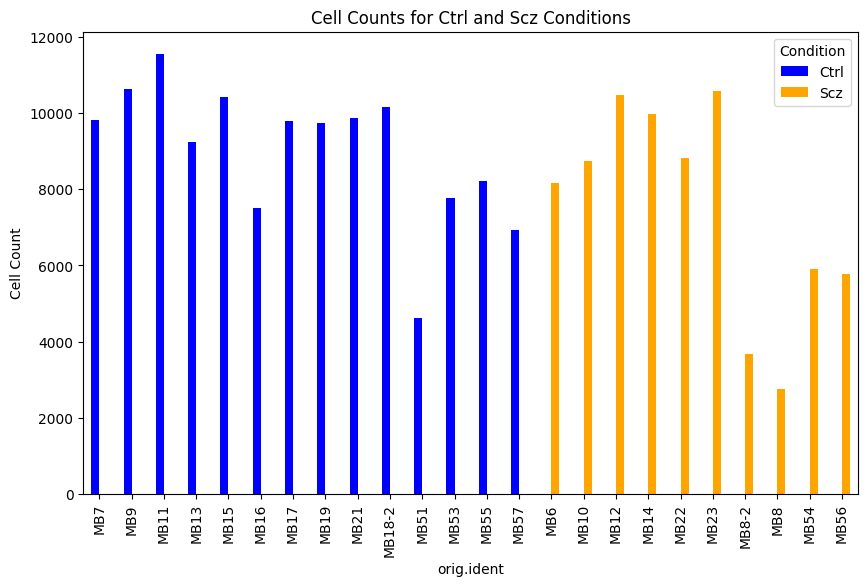

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the unique identifiers
unique_ids = adata.obs["orig.ident"].unique()

# Initialize a list to store the counts
count_data = []

# Iterate over the unique identifiers and collect the counts
for i in unique_ids:
    counts = adata.obs[adata.obs["orig.ident"] == i]["condition"].value_counts()
    count_data.append(counts)

# Convert the list of series into a DataFrame
df_counts = pd.DataFrame(count_data, index=unique_ids).fillna(0)

# Plotting
ax = df_counts.plot(kind='bar', stacked=False, color=['blue', 'orange'], figsize=(10, 6))

# Adding labels and title
ax.set_xlabel('orig.ident')
ax.set_ylabel('Cell Count')
ax.set_title('Cell Counts for Ctrl and Scz Conditions')

# Adding a legend
ax.legend(title='Condition')

# Display the plot
plt.show()


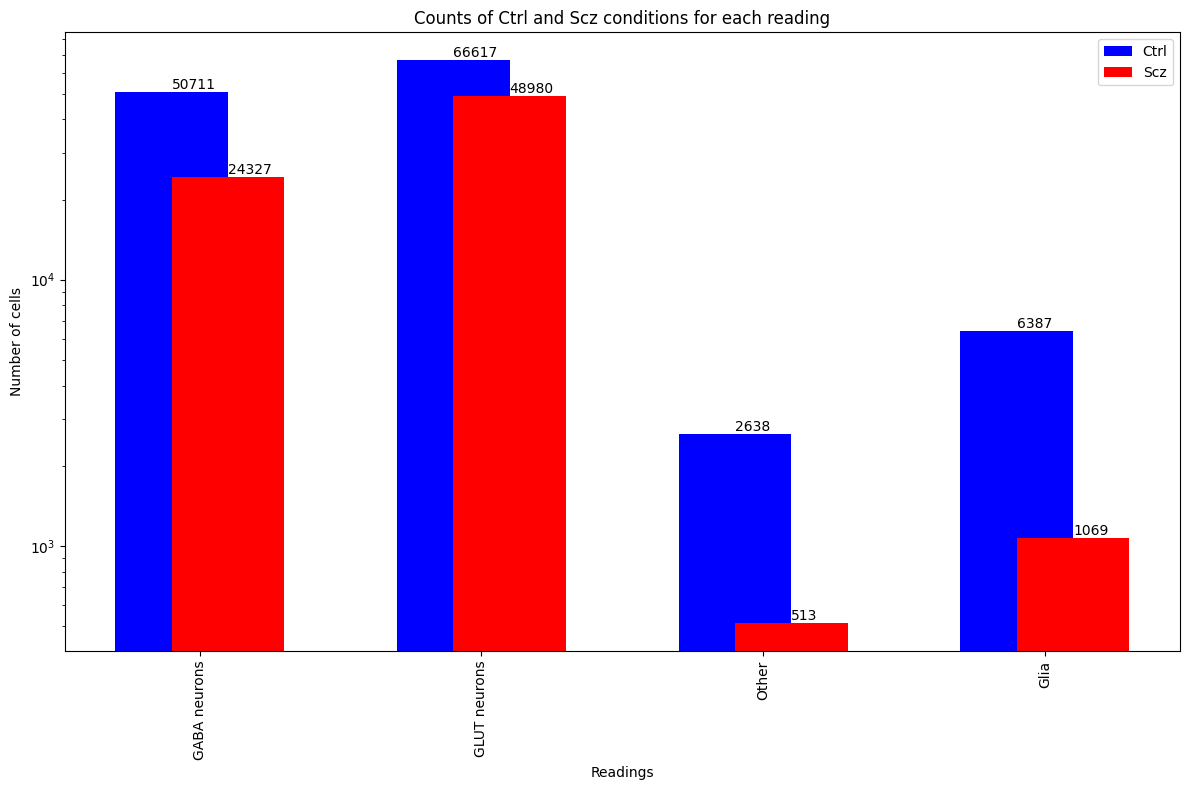

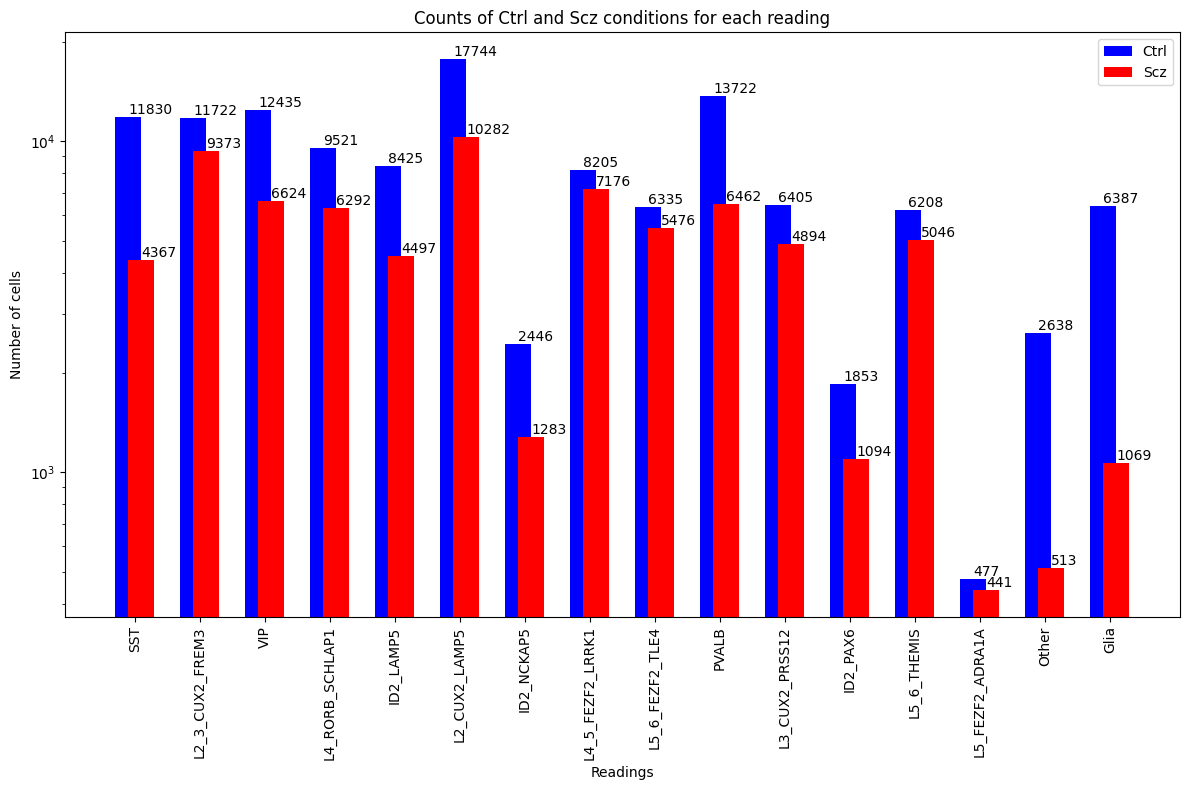

In [ ]:
import matplotlib.pyplot as plt

def plot_condition_counts(adata, type):
    """
    Plots the counts of 'Ctrl' and 'Scz' conditions for each reading in the series.

    Parameters:
    adata : AnnData
        Annotated data matrix.
    type : str
        Column name in adata.obs to group by.
    """
    # Prepare data for plotting
    ctrl_counts = []
    scz_counts = []
    series = list(adata.obs[type].unique())

    for a in series:
        counts = adata.obs[adata.obs[type] == a]["condition"].value_counts()
        #print(counts)
        ctrl_counts.append(counts.get("Ctrl", 0))
        scz_counts.append(counts.get("Scz", 0))

    # Plot the data
    x = range(len(series))  # X-axis: indices of readings

    plt.figure(figsize=(12, 8))

    bar_width = 0.4
    overlap_offset = 0.2

    bars_ctrl = plt.bar(x, ctrl_counts, width=bar_width, label='Ctrl', align='center', color='blue')
    bars_scz = plt.bar([i + overlap_offset for i in x], scz_counts, width=bar_width, label='Scz', align='center', color='red')

    # Add text annotations to each bar
    for bar in bars_ctrl:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # Adjust va for position

    for bar in bars_scz:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom')  # Adjust va for position

    plt.xlabel('Readings')
    plt.ylabel('Number of cells')
    plt.title('Counts of Ctrl and Scz conditions for each reading')
    plt.xticks([i + overlap_offset / 2 for i in x], series, rotation='vertical')
    plt.yscale("log")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_condition_counts(adata, "cellTypeL2")
plot_condition_counts(adata, "cellType")
#plot_condition_counts(adata, "orig.ident")


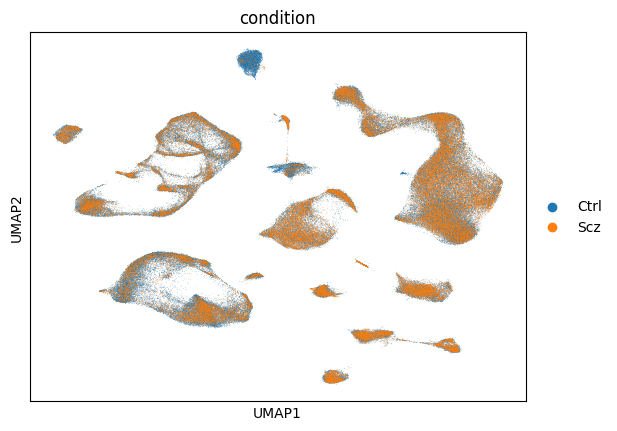

In [ ]:

# Plot UMAP
sc.pl.umap(adata, color=['condition'], show=True)  # Replace 'cell_type' with your actual annotation


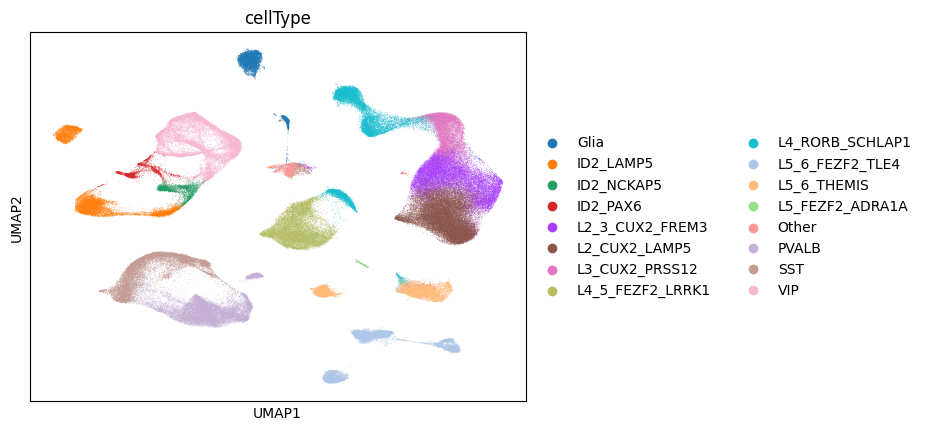

In [ ]:
sc.pl.umap(adata, color=['cellType'], show=True)  # Replace 'cell_type' with your actual annotation

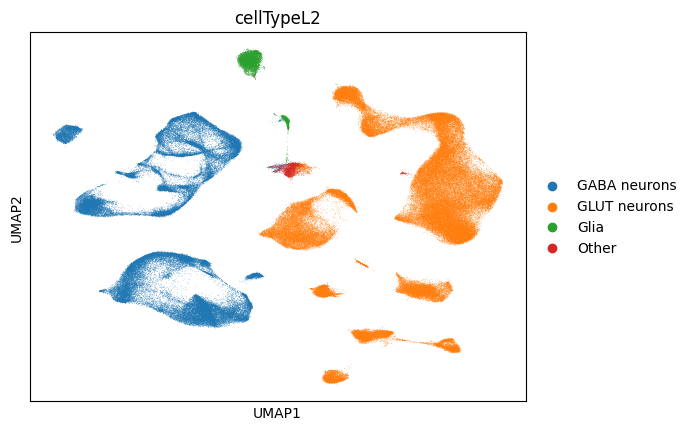

In [ ]:
sc.pl.umap(adata, color=['cellTypeL2'], show=True)  # Replace 'cell_type' with your actual annotation

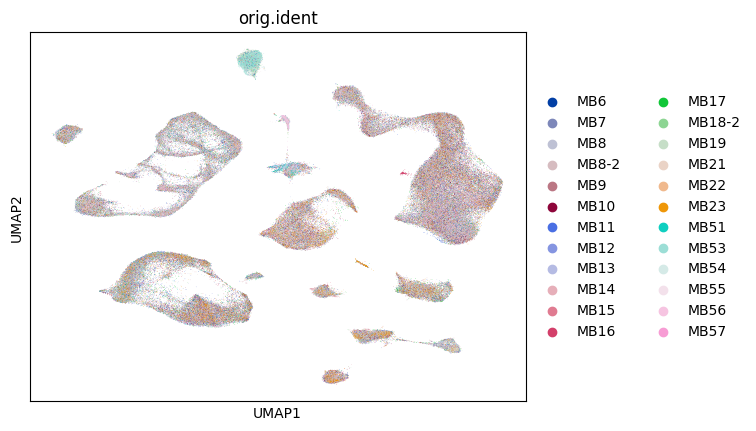

In [ ]:
sc.pl.umap(adata, color=['orig.ident'], show=True)  # Replace 'cell_type' with your actual annotation

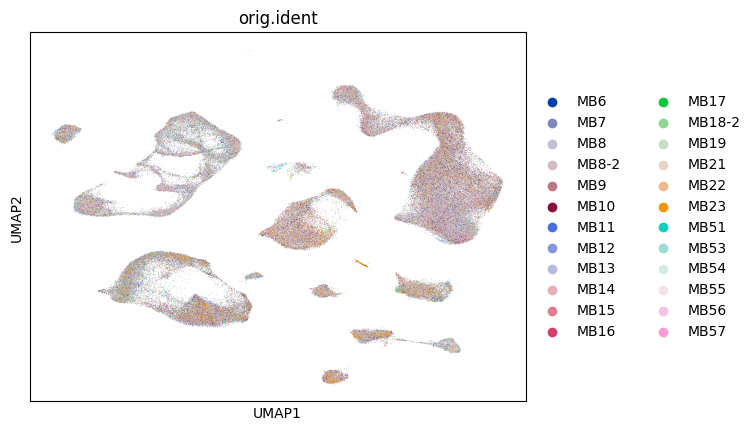

In [ ]:
splatter2 = adata[adata.obs["cellTypeL2"].isin(["GLUT neurons","GABA neurons"])]

sc.pl.umap(splatter2, color=['orig.ident'], show=True)

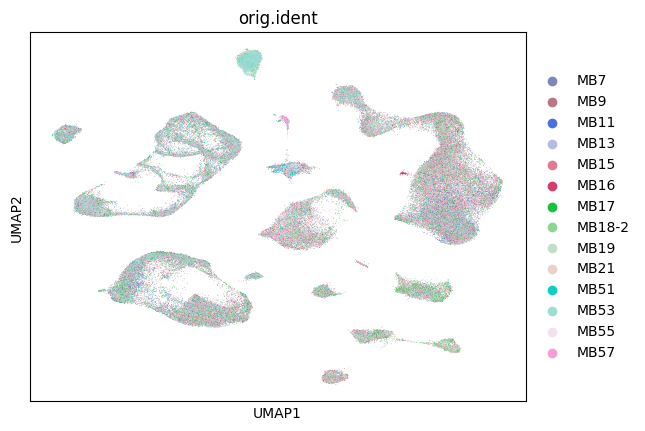

In [ ]:
splatter2 = adata[adata.obs["condition"].isin(["Ctrl"])]

sc.pl.umap(splatter2, color=['orig.ident'], show=True)

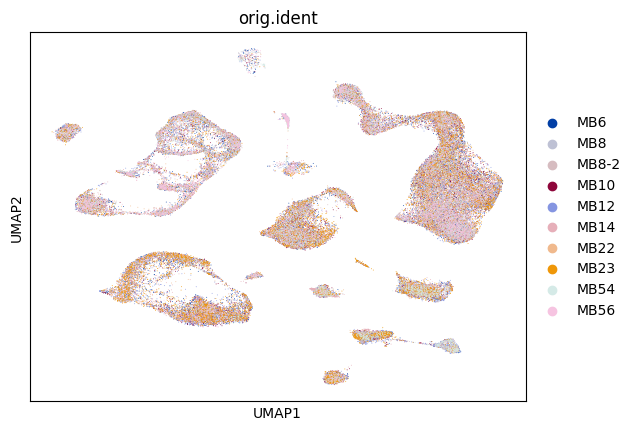

In [ ]:
splatter2 = adata[adata.obs["condition"].isin(["Scz"])]

sc.pl.umap(splatter2, color=['orig.ident'], show=True)

# Tokenization

In [ ]:
from geneformer import TranscriptomeTokenizer

# Include features from the scRNA data that you want to include in your tokenized dataset in the format: "col name in scRNA data" : "col name in tokenized data"
tk = TranscriptomeTokenizer(custom_attr_name_dict = {"cellTypeL2":"subType",          # features to keep
                                                     #"orig.ident": "individual",
                                                     "cellType": "cellType",
                                                     "condition": "condition",
                                                     # "nCount_RNA": "nCount_RNA",
                                                     # "percent.mt":"percent_mt",
                                                     # "nFeature_RNA":"nFeature_RNA",
                                                     # "Age" : "Age",
                                                     # "Gender":"Gender"
                                                    }, nproc=16)

tk.tokenize_data( '/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/scRNA_dataset',  # All the .h5ad files in this directory will be tokenized. Keep only the file you want to tokenize.
                 "/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/Tokenized_dataset", # output directory where the tokenized file will be saved
                 "output_tokenize_balanced_scz_dataset_upsample_all_scz_indv_no_indv_ids", # output file name, give unique name to your tokenized file to avoid overlap
                 file_format="h5ad")

# Classification

In [ ]:
import datetime
from geneformer import Classifier
import torch
import ray
from ray import tune
import pandas as pd

In [ ]:
current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
datestamp_min = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}"

output_prefix = "classify"
output_dir = f"/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/{datestamp}"
!mkdir $output_dir

In [ ]:
print(datestamp,output_dir,output_prefix)

240919190052 /data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/240919190052 classify


 53%|█████▎    | 1405/2636 [05:46<04:55,  4.16it/s]


(_objective pid=659123) {'loss': 0.5726, 'grad_norm': 5.623866558074951, 'learning_rate': 0.00021500068209065216, 'epoch': 0.53}


100%|██████████| 2636/2636 [10:46<00:00,  4.53it/s]
(_objective pid=659123) /home/ALKERMES/sahu_vivekanand/.conda/envs/MyGenformer/lib/python3.11/site-packages/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
(_objective pid=659123)   batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
(_objective pid=659123) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
(_objective pid=659123)   with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
(_objective pid=659123) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/_functions.py

In [ ]:
filter_data_dict= {"subType":['GABA neurons', 'GLUT neurons']}            # set the filter on your data to be considered for all the tasks
input_data_file="/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/Tokenized_dataset/output_tokenize_balanced_scz_dataset_upsample_all_scz_indv_no_add_features.dataset"     # this is the tokenized dataset you will using

## 1.1 Indv split Classification

In [ ]:
# this is the split of individuals. You can find better split by performing some data analysis
train_ids = [ 'MB0', 'MB6', 'MB10', 'MB14',  'MB8', 'MB8-2', 'MB12', 'MB23',
             'MB7', 'MB9', 'MB11',  'MB15', 'MB17', 'MB21', 'MB18-2', 'MB51', 'MB57', 'MB53']
eval_ids = ['MB22', 'MB54',
             'MB13', 'MB16', 'MB55']
test_ids = ['MB56',
             'MB19']
train_test_id_split_dict = {"attr_key": "individual",
                            "train": train_ids+eval_ids,
                            "test": test_ids}

train_valid_id_split_dict = {"attr_key": "individual",
                            "train": train_ids,
                            "eval": eval_ids}

# hyperparameters used for training
training_args = {
    "num_train_epochs": 1,
    "learning_rate": 0.000996769 ,
    "lr_scheduler_type":"polynomial",
    "warmup_steps": 467 ,
    "weight_decay": 0.606852 ,
    "per_device_train_batch_size": 8,
    "seed": 9, #73,
}

def_ray_config = None
n_hyperopt_trials = 0

## 1.2 Indv split Hyperparameter Tuning

In [ ]:
# this is the split of individuals. You can find better split by performing some data analysis
train_ids = [ 'MB0', 'MB6', 'MB10', 'MB14',  'MB8', 'MB8-2', 'MB12', 'MB23',
             'MB7', 'MB9', 'MB11',  'MB15', 'MB17', 'MB21', 'MB18-2', 'MB51', 'MB57', 'MB53']
eval_ids = ['MB22', 'MB54',
             'MB13', 'MB16', 'MB55']
test_ids = ['MB56',
             'MB19']
train_test_id_split_dict = {"attr_key": "individual",
                            "train": train_ids+eval_ids,
                            "test": test_ids}

train_valid_id_split_dict = {"attr_key": "individual",
                            "train": train_ids,
                            "eval": eval_ids}

training_args = None

# the range of values for each hyperparameter that you want to consider duing hyperparameter trials
def_ray_config = {
    "num_train_epochs": tune.choice([1]),
    "learning_rate": tune.loguniform(1e-6, 1e-3),
    "weight_decay": tune.uniform(0.2, 0.7),
    "lr_scheduler_type": tune.choice(["cosine", "polynomial"]),
    "warmup_steps": tune.randint(100, 2000),
    "seed": tune.randint(0, 10),
    "per_device_train_batch_size": tune.choice(
        [8, 16]
    ),
}

n_hyperopt_trials = 100

## 2.1 Homo split Classification

In [ ]:
train_test_id_split_dict = None
train_valid_id_split_dict = None

# hyperparameters used for training
training_args = {
    "num_train_epochs": 1,
    "learning_rate": 0.000996769 ,
    "lr_scheduler_type":"polynomial",
    "warmup_steps": 467 ,
    "weight_decay": 0.606852 ,
    "per_device_train_batch_size": 8,
    "seed": 9,
}

def_ray_config = None
n_hyperopt_trials = 0

## 2.2 Homo split Hyperparameter Tuning


In [ ]:
train_test_id_split_dict = None
train_valid_id_split_dict = None

training_args = None

# the range of values for each hyperparameter that you want to consider duing hyperparameter trials
def_ray_config = {
    "num_train_epochs": tune.choice([1]),
    "learning_rate": tune.loguniform(1e-6, 1e-3),
    "weight_decay": tune.uniform(0.2, 0.7),
    "lr_scheduler_type": tune.choice(["cosine", "polynomial"]),
    "warmup_steps": tune.randint(100, 2000),
    "seed": tune.randint(0, 10),
    "per_device_train_batch_size": tune.choice(
        [8, 16]
    ),
}

n_hyperopt_trials = 100

## Training

In [ ]:
# Defining the classifier
cc = Classifier(classifier="cell",
                cell_state_dict = {"state_key": "condition", "states": "all"},
                filter_data=filter_data_dict,
                training_args=training_args,
                max_ncells=None,
                freeze_layers = 3,
                num_crossval_splits = 1,
                forward_batch_size=128,           # It is the inference batch size (not training). changing this if you have cuda error
                nproc=16,
                ray_config = def_ray_config,
                split_sizes={"train": 0.7, "valid": 0.2, "test": 0.1},
                ngpu=torch.cuda.device_count())   # number of GPUs to be used

Hyperparameter tuning is highly recommended for optimal results. No training_args provided; using default hyperparameters.


In [ ]:
# prepares the training, val, test datasets
cc.prepare_data(input_data_file=input_data_file,
                output_directory=output_dir,
                output_prefix=output_prefix,
                split_id_dict=train_test_id_split_dict
               )

Map (num_proc=16):   0%|          | 0/241006 [00:00<?, ? examples/s]

Saving the dataset (0/2 shards):   0%|          | 0/216905 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/24101 [00:00<?, ? examples/s]

In [ ]:
# training and validation
all_metrics = cc.validate(model_directory="/data-hpcwn-pnl03/FXG/Geneformer_archive/geneformer_libs/Geneformer_VS",
                          prepared_input_data_file=f"{output_dir}/{output_prefix}_labeled_train.dataset",
                          id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
                          output_directory=output_dir,
                          output_prefix=output_prefix,
                          split_id_dict=train_valid_id_split_dict,
                          n_hyperopt_trials=n_hyperopt_trials
                          )

  0%|          | 0/1 [00:00<?, ?it/s]

****** Validation split: 1/1 ******



2024-09-19 19:04:13,038	INFO worker.py:1783 -- Started a local Ray instance.
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at /data-hpcwn-pnl03/FXG/Geneformer_archive/geneformer_libs/Geneformer_VS and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
Some weights of BertForSequenceClassification were not initialized from the mo

== Status ==
Current time: 2024-09-19 19:04:17 (running for 00:00:00.12)
Using FIFO scheduling algorithm.
Logical resource usage: 0/112 CPUs, 0/8 GPUs (0.0/1.0 accelerator_type:V100)
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 1/100 (1 PENDING)
+---------------------+----------+-------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+
| Trial name          | status   | loc   |   learning_rate | lr_scheduler_type   |   num_train_epochs |   per_device_train_bat |   seed |   warmup_steps |   weight_decay |
|                     |          |       |                 |                     |                    |                ch_size |        |                |                |
|---------------------+----------+-------+-----------------+---------------------+--------------------+------------------

(_objective pid=515749) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_objective pid=

== Status ==
Current time: 2024-09-19 19:14:17 (running for 00:10:00.15)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 2/100 (1 PENDING, 1 RUNNING)
+---------------------+----------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+
| Trial name          | status   | loc                  |   learning_rate | lr_scheduler_type   |   num_train_epochs |   per_device_train_bat |   seed |   warmup_steps |   weight_decay |
|                     |          |                      |                 |                     |                    |                ch_size |        |                |                |
|---------------------+----------+----------------------+----

100%|██████████| 1318/1318 [09:54<00:00,  2.49it/s]
(_objective pid=515749) /home/ALKERMES/sahu_vivekanand/.conda/envs/MyGenformer/lib/python3.11/site-packages/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
(_objective pid=515749)   batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
(_objective pid=515749) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
(_objective pid=515749)   with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
(_objective pid=515749) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/_functions.py

(_objective pid=515749) {'eval_loss': 0.6079540848731995, 'eval_accuracy': 0.674619310402058, 'eval_macro_f1': 0.6701545684144954, 'eval_runtime': 95.9394, 'eval_samples_per_second': 502.422, 'eval_steps_per_second': 5.243, 'epoch': 1.0}


(_objective pid=515749) 
                                                   A
100%|██████████| 503/503 [01:35<00:00,  5.29it/s]
                                                 


Trial name,epoch,eval_accuracy,eval_loss,eval_macro_f1,eval_runtime,eval_samples_per_second,eval_steps_per_second,objective,should_checkpoint
_objective_1ba6bd1c,1,0.636737,0.643611,0.624747,97.2617,495.591,5.172,1.26148,True
_objective_51fdcf3c,1,0.559043,0.682409,0.514495,96.8399,497.749,5.194,1.07354,True
_objective_705fc2be,1,0.703747,0.585972,0.685374,97.1021,496.405,5.18,1.38912,True
_objective_753af312,1,0.674619,0.607954,0.670155,95.9394,502.422,5.243,1.34477,True
_objective_d843b557,1,0.62709,0.649154,0.60235,96.6329,498.815,5.205,1.22944,True
_objective_f5b3ca1a,1,0.847247,0.345475,0.845796,96.8832,497.527,5.192,1.69304,True
_objective_f8a05203,1,0.553857,0.68635,0.498123,98.2539,490.586,5.119,1.05198,True


(_objective pid=515749) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/240919190052/240919_geneformer_cellClassifier_classify/ksplit1/_objective_2024-09-19_19-04-17/_objective_753af312_1_learning_rate=0.0000,lr_scheduler_type=polynomial,num_train_epochs=1,per_device_train_batch_size=16,seed=0,w_2024-09-19_19-04-17/checkpoint_000000)


(_objective pid=515749) {'train_runtime': 691.8811, 'train_samples_per_second': 243.832, 'train_steps_per_second': 1.905, 'train_loss': 0.6361346092860869, 'epoch': 1.0}


100%|██████████| 1318/1318 [11:31<00:00,  1.90it/s]
(_objective pid=531940) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

(_objective pid=531940) {'loss': 0.6915, 'grad_norm': 0.8215807676315308, 'learning_rate': 1.6245959373858606e-06, 'epoch': 0.53}


 73%|███████▎  | 1929/2636 [07:57<02:51,  4.12it/s]


== Status ==
Current time: 2024-09-19 19:24:17 (running for 00:20:00.20)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Current best trial: 753af312 with eval_macro_f1=0.6701545684144954 and parameters={'num_train_epochs': 1, 'learning_rate': 4.783781361120916e-05, 'weight_decay': 0.32991894082556295, 'lr_scheduler_type': 'polynomial', 'warmup_steps': 1607, 'seed': 0, 'per_device_train_batch_size': 16}
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 3/100 (1 PENDING, 1 RUNNING, 1 TERMINATED)
+---------------------+------------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+-------------+-----------------+-----------------+
| Trial name          | status     | loc                  |   learning_rate | lr_sc

100%|██████████| 2636/2636 [10:50<00:00,  4.54it/s]
(_objective pid=531940) /home/ALKERMES/sahu_vivekanand/.conda/envs/MyGenformer/lib/python3.11/site-packages/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
(_objective pid=531940)   batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
(_objective pid=531940) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
(_objective pid=531940)   with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
(_objective pid=531940) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/_functions.py

(_objective pid=531940) {'eval_loss': 0.6824086308479309, 'eval_accuracy': 0.5590431932284967, 'eval_macro_f1': 0.5144951471273338, 'eval_runtime': 96.8399, 'eval_samples_per_second': 497.749, 'eval_steps_per_second': 5.194, 'epoch': 1.0}


(_objective pid=531940) 
                                                   A
100%|██████████| 503/503 [01:36<00:00,  5.23it/s]
                                                 
(_objective pid=531940) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/240919190052/240919_geneformer_cellClassifier_classify/ksplit1/_objective_2024-09-19_19-04-17/_objective_51fdcf3c_2_learning_rate=0.0000,lr_scheduler_type=polynomial,num_train_epochs=1,per_device_train_batch_size=8,seed=7,wa_2024-09-19_19-04-23/checkpoint_000000)


(_objective pid=531940) {'train_runtime': 748.1156, 'train_samples_per_second': 225.504, 'train_steps_per_second': 3.524, 'train_loss': 0.6879756620693641, 'epoch': 1.0}


100%|██████████| 2636/2636 [12:28<00:00,  3.52it/s]
(_objective pid=558293) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

== Status ==
Current time: 2024-09-19 19:34:17 (running for 00:30:00.30)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Current best trial: 753af312 with eval_macro_f1=0.6701545684144954 and parameters={'num_train_epochs': 1, 'learning_rate': 4.783781361120916e-05, 'weight_decay': 0.32991894082556295, 'lr_scheduler_type': 'polynomial', 'warmup_steps': 1607, 'seed': 0, 'per_device_train_batch_size': 16}
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 4/100 (1 PENDING, 1 RUNNING, 2 TERMINATED)
+---------------------+------------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+-------------+-----------------+-----------------+
| Trial name          | status     | loc                  |   learning_rate | lr_sc

 53%|█████▎    | 1405/2636 [05:45<04:55,  4.17it/s]


(_objective pid=558293) {'loss': 0.601, 'grad_norm': 19.974441528320312, 'learning_rate': 0.0004885227297002609, 'epoch': 0.53}


100%|██████████| 2636/2636 [10:45<00:00,  4.53it/s]
(_objective pid=558293) /home/ALKERMES/sahu_vivekanand/.conda/envs/MyGenformer/lib/python3.11/site-packages/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
(_objective pid=558293)   batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
(_objective pid=558293) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
(_objective pid=558293)   with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
(_objective pid=558293) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/_functions.py

(_objective pid=558293) {'eval_loss': 0.3454752564430237, 'eval_accuracy': 0.8472470021990789, 'eval_macro_f1': 0.8457964698128422, 'eval_runtime': 96.8832, 'eval_samples_per_second': 497.527, 'eval_steps_per_second': 5.192, 'epoch': 1.0}


(_objective pid=558293) 
                                                   A
100%|██████████| 503/503 [01:36<00:00,  5.28it/s]
                                                 
(_objective pid=558293) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/240919190052/240919_geneformer_cellClassifier_classify/ksplit1/_objective_2024-09-19_19-04-17/_objective_f5b3ca1a_3_learning_rate=0.0006,lr_scheduler_type=polynomial,num_train_epochs=1,per_device_train_batch_size=8,seed=4,wa_2024-09-19_19-16-10/checkpoint_000000)


(_objective pid=558293) {'train_runtime': 743.4047, 'train_samples_per_second': 226.933, 'train_steps_per_second': 3.546, 'train_loss': 0.5248128286080946, 'epoch': 1.0}


100%|██████████| 2636/2636 [12:23<00:00,  3.55it/s]
(_objective pid=584867) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

== Status ==
Current time: 2024-09-19 19:44:18 (running for 00:40:00.40)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Current best trial: f5b3ca1a with eval_macro_f1=0.8457964698128422 and parameters={'num_train_epochs': 1, 'learning_rate': 0.0006195135327564474, 'weight_decay': 0.41926512290540685, 'lr_scheduler_type': 'polynomial', 'warmup_steps': 1783, 'seed': 4, 'per_device_train_batch_size': 8}
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 5/100 (1 PENDING, 1 RUNNING, 3 TERMINATED)
+---------------------+------------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+-------------+-----------------+-----------------+
| Trial name          | status     | loc                  |   learning_rate | lr_sch

 53%|█████▎    | 1405/2636 [05:48<04:55,  4.17it/s]


(_objective pid=584867) {'loss': 0.6842, 'grad_norm': 1.4801069498062134, 'learning_rate': 3.4344931755571146e-06, 'epoch': 0.53}


100%|██████████| 2636/2636 [10:47<00:00,  4.53it/s]
(_objective pid=584867) /home/ALKERMES/sahu_vivekanand/.conda/envs/MyGenformer/lib/python3.11/site-packages/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
(_objective pid=584867)   batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
(_objective pid=584867) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
(_objective pid=584867)   with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
(_objective pid=584867) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/_functions.py

(_objective pid=584867) {'eval_loss': 0.6436114311218262, 'eval_accuracy': 0.6367370648520808, 'eval_macro_f1': 0.6247474590211015, 'eval_runtime': 97.2617, 'eval_samples_per_second': 495.591, 'eval_steps_per_second': 5.172, 'epoch': 1.0}


(_objective pid=584867) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/240919190052/240919_geneformer_cellClassifier_classify/ksplit1/_objective_2024-09-19_19-04-17/_objective_1ba6bd1c_4_learning_rate=0.0000,lr_scheduler_type=cosine,num_train_epochs=1,per_device_train_batch_size=8,seed=8,warmup_2024-09-19_19-28-54/checkpoint_000000)


(_objective pid=584867) {'train_runtime': 746.2622, 'train_samples_per_second': 226.064, 'train_steps_per_second': 3.532, 'train_loss': 0.6681697538662391, 'epoch': 1.0}


100%|██████████| 2636/2636 [12:26<00:00,  3.53it/s]


== Status ==
Current time: 2024-09-19 19:54:18 (running for 00:50:00.48)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Current best trial: f5b3ca1a with eval_macro_f1=0.8457964698128422 and parameters={'num_train_epochs': 1, 'learning_rate': 0.0006195135327564474, 'weight_decay': 0.41926512290540685, 'lr_scheduler_type': 'polynomial', 'warmup_steps': 1783, 'seed': 4, 'per_device_train_batch_size': 8}
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 6/100 (1 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+-------------+-----------------+-----------------+
| Trial name          | status     | loc                  |   learning_rate | lr_sch

(_objective pid=611346) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
(_objective pid=

== Status ==
Current time: 2024-09-19 20:04:18 (running for 01:00:00.58)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Current best trial: f5b3ca1a with eval_macro_f1=0.8457964698128422 and parameters={'num_train_epochs': 1, 'learning_rate': 0.0006195135327564474, 'weight_decay': 0.41926512290540685, 'lr_scheduler_type': 'polynomial', 'warmup_steps': 1783, 'seed': 4, 'per_device_train_batch_size': 8}
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 6/100 (1 PENDING, 1 RUNNING, 4 TERMINATED)
+---------------------+------------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+-------------+-----------------+-----------------+
| Trial name          | status     | loc                  |   learning_rate | lr_sch

100%|██████████| 1318/1318 [10:04<00:00,  2.45it/s]
(_objective pid=611346) /home/ALKERMES/sahu_vivekanand/.conda/envs/MyGenformer/lib/python3.11/site-packages/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
(_objective pid=611346)   batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
(_objective pid=611346) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
(_objective pid=611346)   with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
(_objective pid=611346) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/_functions.py

(_objective pid=611346) {'eval_loss': 0.6863498687744141, 'eval_accuracy': 0.5538566864445459, 'eval_macro_f1': 0.49812260656354446, 'eval_runtime': 98.2539, 'eval_samples_per_second': 490.586, 'eval_steps_per_second': 5.119, 'epoch': 1.0}


(_objective pid=611346) 
                                                   A
100%|██████████| 503/503 [01:37<00:00,  5.25it/s]
                                                 
(_objective pid=611346) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/240919190052/240919_geneformer_cellClassifier_classify/ksplit1/_objective_2024-09-19_19-04-17/_objective_f8a05203_5_learning_rate=0.0000,lr_scheduler_type=polynomial,num_train_epochs=1,per_device_train_batch_size=16,seed=1,w_2024-09-19_19-41-32/checkpoint_000000)


(_objective pid=611346) {'train_runtime': 704.2289, 'train_samples_per_second': 239.557, 'train_steps_per_second': 1.872, 'train_loss': 0.6920796280022999, 'epoch': 1.0}


100%|██████████| 1318/1318 [11:44<00:00,  1.87it/s]
(_objective pid=627334) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

== Status ==
Current time: 2024-09-19 20:14:18 (running for 01:10:00.63)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Current best trial: f5b3ca1a with eval_macro_f1=0.8457964698128422 and parameters={'num_train_epochs': 1, 'learning_rate': 0.0006195135327564474, 'weight_decay': 0.41926512290540685, 'lr_scheduler_type': 'polynomial', 'warmup_steps': 1783, 'seed': 4, 'per_device_train_batch_size': 8}
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 7/100 (1 PENDING, 1 RUNNING, 5 TERMINATED)
+---------------------+------------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+-------------+-----------------+-----------------+
| Trial name          | status     | loc                  |   learning_rate | lr_sch

100%|██████████| 1318/1318 [09:55<00:00,  2.48it/s]
(_objective pid=627334) /home/ALKERMES/sahu_vivekanand/.conda/envs/MyGenformer/lib/python3.11/site-packages/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
(_objective pid=627334)   batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
(_objective pid=627334) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
(_objective pid=627334)   with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
(_objective pid=627334) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/_functions.py

(_objective pid=627334) {'eval_loss': 0.6491543054580688, 'eval_accuracy': 0.6270901622339322, 'eval_macro_f1': 0.602350363192856, 'eval_runtime': 96.6329, 'eval_samples_per_second': 498.815, 'eval_steps_per_second': 5.205, 'epoch': 1.0}


(_objective pid=627334) 
                                                   A
100%|██████████| 503/503 [01:36<00:00,  5.36it/s]
                                                 
(_objective pid=627334) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/240919190052/240919_geneformer_cellClassifier_classify/ksplit1/_objective_2024-09-19_19-04-17/_objective_d843b557_6_learning_rate=0.0000,lr_scheduler_type=polynomial,num_train_epochs=1,per_device_train_batch_size=16,seed=6,w_2024-09-19_19-54-13/checkpoint_000000)


(_objective pid=627334) {'train_runtime': 693.2667, 'train_samples_per_second': 243.345, 'train_steps_per_second': 1.901, 'train_loss': 0.6587168298469509, 'epoch': 1.0}


100%|██████████| 1318/1318 [11:33<00:00,  1.90it/s]
(_objective pid=643213) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

== Status ==
Current time: 2024-09-19 20:24:18 (running for 01:20:00.73)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Current best trial: f5b3ca1a with eval_macro_f1=0.8457964698128422 and parameters={'num_train_epochs': 1, 'learning_rate': 0.0006195135327564474, 'weight_decay': 0.41926512290540685, 'lr_scheduler_type': 'polynomial', 'warmup_steps': 1783, 'seed': 4, 'per_device_train_batch_size': 8}
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 8/100 (1 PENDING, 1 RUNNING, 6 TERMINATED)
+---------------------+------------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+-------------+-----------------+-----------------+
| Trial name          | status     | loc                  |   learning_rate | lr_sch

100%|██████████| 1318/1318 [09:54<00:00,  2.48it/s]
(_objective pid=643213) /home/ALKERMES/sahu_vivekanand/.conda/envs/MyGenformer/lib/python3.11/site-packages/geneformer/collator_for_classification.py:581: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
(_objective pid=643213)   batch = {k: torch.tensor(v, dtype=torch.int64) for k, v in batch.items()}
(_objective pid=643213) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/parallel_apply.py:79: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
(_objective pid=643213)   with torch.cuda.device(device), torch.cuda.stream(stream), autocast(enabled=autocast_enabled):
(_objective pid=643213) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/nn/parallel/_functions.py

(_objective pid=643213) {'eval_loss': 0.5859723687171936, 'eval_accuracy': 0.7037467325007261, 'eval_macro_f1': 0.6853742936429545, 'eval_runtime': 97.1021, 'eval_samples_per_second': 496.405, 'eval_steps_per_second': 5.18, 'epoch': 1.0}


(_objective pid=643213) 
                                                   A
100%|██████████| 503/503 [01:36<00:00,  5.38it/s]
                                                 
(_objective pid=643213) Checkpoint successfully created at: Checkpoint(filesystem=local, path=/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/classification/240919190052/240919_geneformer_cellClassifier_classify/ksplit1/_objective_2024-09-19_19-04-17/_objective_705fc2be_7_learning_rate=0.0003,lr_scheduler_type=cosine,num_train_epochs=1,per_device_train_batch_size=16,seed=1,warmu_2024-09-19_20-06-12/checkpoint_000000)


(_objective pid=643213) {'train_runtime': 692.7428, 'train_samples_per_second': 243.529, 'train_steps_per_second': 1.903, 'train_loss': 0.5725691799690582, 'epoch': 1.0}


100%|██████████| 1318/1318 [11:32<00:00,  1.90it/s]
(_objective pid=659123) /home/ALKERMES/sahu_vivekanand/.local/lib/python3.11/site-packages/torch/storage.py:414: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues re

== Status ==
Current time: 2024-09-19 20:32:47 (running for 01:28:29.99)
Using FIFO scheduling algorithm.
Logical resource usage: 2.0/112 CPUs, 8.0/8 GPUs (0.0/1.0 accelerator_type:V100)
Current best trial: f5b3ca1a with eval_macro_f1=0.8457964698128422 and parameters={'num_train_epochs': 1, 'learning_rate': 0.0006195135327564474, 'weight_decay': 0.41926512290540685, 'lr_scheduler_type': 'polynomial', 'warmup_steps': 1783, 'seed': 4, 'per_device_train_batch_size': 8}
Result logdir: /tmp/ray/session_2024-09-19_19-04-11_232665_508503/artifacts/2024-09-19_19-04-17/_objective_2024-09-19_19-04-17/driver_artifacts
Number of trials: 9/100 (1 PENDING, 1 RUNNING, 7 TERMINATED)
+---------------------+------------+----------------------+-----------------+---------------------+--------------------+------------------------+--------+----------------+----------------+-------------+-----------------+-----------------+
| Trial name          | status     | loc                  |   learning_rate | lr_sch

 27%|██▋       | 703/2636 [02:55<07:47,  4.13it/s]


KeyboardInterrupt: 

# Evaluation

In [ ]:
import datetime
from geneformer import Classifier
import torch

In [ ]:
# If using saved model, define these parameters, can use the variables defined above

# output_prefix = "classify"
# output_dir = ''
# filter_data_dict=  # example {"subType":['GABA neurons', 'GLUT neurons']}            # set the filter on your data to be considered for all the tasks
# input_data_file= # example "/home/ALKERMES/sahu_vivekanand/Data/scz_data/output_tokenize_balanced_scz_dataset_upsample_all_scz_indv.dataset"     # this is the tokenized dataset you will using
# output_prefix = ''
# model_directory = ''

#OR

# If using Currently trained model
model_directory=f"{output_dir}/{datestamp_min}_geneformer_cellClassifier_{output_prefix}/ksplit1"

## Plots

In [ ]:
# redefining classifier
cc = Classifier(classifier="cell",
                cell_state_dict = {"state_key": "condition", "states": "all"},
                forward_batch_size=200, # change this if you encounter Cuda memory error
                nproc=16)

# results on test set
all_metrics_test = cc.evaluate_saved_model(
        model_directory=model_directory,
        id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
        test_data_file=f"{output_dir}/{output_prefix}_labeled_test.dataset",
        output_directory=output_dir,
        output_prefix=output_prefix,
    )

# plotting conf matrix
cc.plot_conf_mat(
        conf_mat_dict={"Geneformer": all_metrics_test["conf_matrix"]},
        output_directory=output_dir,
        output_prefix=output_prefix,
        custom_class_order=["Scz", "Ctrl"]
                           )

# plotting heatmap on confidence scores
cc.plot_predictions(
    predictions_file=f"{output_dir}/{output_prefix}_pred_dict.pkl",
    id_class_dict_file=f"{output_dir}/{output_prefix}_id_class_dict.pkl",
    title="condition",
    output_directory=output_dir,
    output_prefix=output_prefix,
    #custom_class_order=["Ctrl","Scz"],
)

In [ ]:
# plotting ROC
import numpy as np
import matplotlib.pyplot as plt

# Extracting the data from the dictionary
mean_tpr = np.array(all_metrics_test["all_roc_metrics"]['mean_tpr'])
mean_fpr = np.array(all_metrics_test["all_roc_metrics"]['mean_fpr'])
all_roc_auc = all_metrics_test["all_roc_metrics"]['all_roc_auc']


# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(mean_fpr, mean_tpr, color='b', lw=2, label=f'ROC curve (area = {all_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Adding labels and title
plt.xlabel('False Positive Rate', fontsize=10)
plt.ylabel('True Positive Rate', fontsize=10)
plt.title('Receiver Operating Characteristic', fontsize=12)

# Setting font size for ticks
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

# Adding legend
plt.legend(loc='lower right', fontsize=8)

# Displaying the plot
plt.show()

In [ ]:
# all_metrics_test

# Embedding Extraction

In [ ]:
# If using saved model, define these parameters, can use the variables defined above

# output_prefix = "classify"
# output_dir = ''
# filter_data_dict=  # example {"subType":['GABA neurons', 'GLUT neurons']}            # set the filter on your data to be considered for all the tasks
# input_data_file= # example "/home/ALKERMES/sahu_vivekanand/Data/scz_data/output_tokenize_balanced_scz_dataset_upsample_all_scz_indv.dataset"     # this is the tokenized dataset you will using
# output_prefix = ''
# model_directory = ''

In [ ]:
from geneformer import EmbExtractor

# initiate EmbExtractor
embex = EmbExtractor(model_type="CellClassifier",
                     num_classes=2,
                     filter_data=filter_data_dict,
                     max_ncells=10000,
                     emb_layer=0,
                     emb_label=["condition"], # viz embeddings on this parameter
                     labels_to_plot=["condition"], # viz embeddings on this parameter
                     forward_batch_size=200,
                     nproc=16)


embs = embex.extract_embs(model_directory,
                          input_data_file,
                          "/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/embeddings", # output directory
                          "output_prefix_emb_plot" # output file name
                         )

In [ ]:
# UMAP for embeddings
embex.plot_embs(embs=embs,
                plot_style="umap",
                output_directory="/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/embeddings",
                output_prefix="output_prefix_plot",
               max_ncells_to_plot = 1000)

In [ ]:
# Heatmap for embeddings
embex.plot_embs(embs=embs,
                plot_style="heatmap",
                output_directory="/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/embeddings",
                output_prefix="output_prefix_plot_heat")

# In Silico Perturbation

In [ ]:
#If using saved model, define these parameters, can use the variables defined above

# output_prefix = "classify"
# output_dir = ''
# filter_data_dict=  # example {"subType":['GABA neurons', 'GLUT neurons']}            # set the filter on your data to be considered for all the tasks
# input_data_file= # example "/home/ALKERMES/sahu_vivekanand/Data/scz_data/output_tokenize_balanced_scz_dataset_upsample_all_scz_indv.dataset"     # this is the tokenized dataset you will using
# output_prefix = ''
# model_directory = ''

In [ ]:
from geneformer import InSilicoPerturber
from geneformer import InSilicoPerturberStats
from geneformer import EmbExtractor

In [ ]:
# Defining cell states
cell_states_to_model={"state_key": "condition",
                      "start_state": "Scz",
                      "goal_state": "Ctrl",
                      "alt_states": ["Scz"]}

output_directory_folder = "/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/In_silico_perturbation_files"
dataset=input_data_file

# creating the embedding extrctor
embex = EmbExtractor(model_type="CellClassifier",
                     num_classes=2,
                     filter_data=filter_data_dict,
                     max_ncells=10000, #1000
                     emb_layer=0,
                     summary_stat="exact_mean",
                     forward_batch_size=120,
                     nproc=16)

# Extract exact mean or exact median cell state embedding positions from input data and save as results in output_directory.
state_embs_dict = embex.get_state_embs(cell_states_to_model,
                                       model_directory,
                                       dataset,
                                       output_directory_folder,
                                       "output_enc")
import pandas as pd

# Importing the list of unique genes present in the dataset
df = pd.read_csv('/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/In_silico_perturbation_files/unique_genes.csv')
print(df.shape)

# Ignore genes starting from 'MIR' and 'MT-'
df = df[~df['symbol'].str.startswith(('MIR', 'MT-'), na=False)]
print(df.shape)

# Create the dictionary
gene_dict = pd.Series(df.ensembl_id.values, index=df.symbol).to_dict()

## 1 All / list of genes (1 at a time)

In [ ]:
import datetime
import shutil

# In silico perturbation function that perturbes all genes mentioned in the list fed as an input to the model.
# Remember that it uses only the first GPU. For utilizing all the GPUs use the multiGPU .py file.
def perturb_genes(gene_pert_list):
    output_directory_folder = "/data-hpcwn-pnl03/FXG/Geneformer_archive/Data/In_silico_perturbation_files"
    current_date = datetime.datetime.now()
    datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
    output_directory_folder = output_directory_folder + '/trials_' + str(datestamp)
    os.makedirs(output_directory_folder+ '/stats')
    pd.DataFrame(columns=['Pert_type', 'Gene_name', 'Shift_to_goal_end', 'Shift_to_alt_end_Scz']).to_csv(output_directory_folder + '/stats' + '/combined_stats.csv', index=False)
    print('for', output_directory_folder)

    output_directory = ''

    for s in gene_pert_list:
        for perturb_type in ["delete", "overexpress"]:
            try:
                print(perturb_type, s)
                current_date = datetime.datetime.now()
                datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"
                genes_ens_ids = list(gene_dict[x] for x in [s])
                genes = ''
                for i in [s]:
                    genes+=i + '_'
                genes = genes[:-1]

                output_directory = output_directory_folder + '/' + str(perturb_type + '_' + genes + '_' +str(datestamp))
                os.makedirs(output_directory)

                isp = InSilicoPerturber(perturb_type=perturb_type,
                                    perturb_rank_shift=None,
                                    genes_to_perturb= genes_ens_ids,
                                    combos=0,
                                    anchor_gene=None,
                                    model_type="CellClassifier",
                                    num_classes=2,
                                    emb_mode="cell",
                                    cell_emb_style="mean_pool",
                                    filter_data=filter_data_dict,
                                    cell_states_to_model= cell_states_to_model,      # None,cell_states_to_model
                                    state_embs_dict=state_embs_dict,          # None, state_embs_dict
                                    max_ncells= 2000,
                                    emb_layer=0,
                                    forward_batch_size=128,   # reduce this to avoid cuda memory error
                                    nproc=1)

                isp.perturb_data(model_directory,
                              dataset,
                              output_directory,
                              "scz_output_pert")

                ispstats = InSilicoPerturberStats(mode= "goal_state_shift",
                                              genes_perturbed= genes_ens_ids,
                                              combos=0,
                                              anchor_gene=None,
                                              cell_states_to_model=cell_states_to_model)

                ispstats.get_stats(output_directory,
                                   None,
                                   output_directory_folder + '/stats',
                                   str(perturb_type + '_' + genes + '_' + str(datestamp)))

                for file_name in os.listdir(output_directory_folder + '/stats'):
                    if file_name.startswith(('delete', 'overexpress')):
                        parts = file_name.split('_')
                        file_path = os.path.join(output_directory_folder + '/stats', file_name)
                        df = pd.read_csv(file_path)
                        new_row = {
                                    'Pert_type': parts[0],
                                    'Gene_name': parts[1],
                                    'Shift_to_goal_end': df['Shift_to_goal_end'].iloc[0],
                                    'Shift_to_alt_end_Scz': df['Shift_to_alt_end_Scz'].iloc[0]
                                }
                        # Append the new row to combined_stats.csv
                        combined_df = pd.DataFrame([new_row])
                        combined_df.to_csv(output_directory_folder + '/stats' + '/combined_stats.csv', mode='a',
                                           header=not os.path.exists(output_directory_folder + '/stats' + '/combined_stats.csv'),
                                           index=False)
                        os.remove(file_path)                 # CAUTION

            except Exception as e:
                print(f"An error occurred: {e}")

            finally:
                if os.path.exists(output_directory):
                    shutil.rmtree(output_directory)      # CAUTION





In [ ]:
# Perturbing the genes from the list of genes 1 at a time
perturb_genes(['CHRM4', 'DRD2', 'HTR2A', 'GPR88', 'KCNC1', 'GPR158', 'CHRM1', 'DRD3', 'TCF4'])

# Perturbing all the genes 1 at a time
#perturb_genes(gene_dict.keys())

## 2 Single / list of genes (simultaneous perturbation)

In [ ]:
# to perturb single or list of genes perturbed simultaneously
genes_list = ['TCF4'] # OR ['TCF4', 'CHRM4']
perturb_type = 'delete'

In [ ]:
import datetime

current_date = datetime.datetime.now()
datestamp = f"{str(current_date.year)[-2:]}{current_date.month:02d}{current_date.day:02d}{current_date.hour:02d}{current_date.minute:02d}{current_date.second:02d}"


genes_ens_ids = list(gene_dict[x] for x in genes_list)
genes = ''
for i in genes_list:
    genes+=i + '_'
genes = genes[:-1]

output_directory = output_directory_folder + '/' + str(perturb_type + 'ing_' + genes + '_' +str(datestamp))
os.makedirs(output_directory)

print(perturb_type, genes_list)

# perturbation function
isp = InSilicoPerturber(perturb_type=perturb_type,
                        perturb_rank_shift=None,
                        genes_to_perturb= genes_ens_ids,
                        combos=0,
                        anchor_gene=None,
                        model_type="CellClassifier",
                        num_classes=2,
                        emb_mode="cell",
                        cell_emb_style="mean_pool",
                        filter_data=filter_data_dict,
                        cell_states_to_model= cell_states_to_model,
                        state_embs_dict=state_embs_dict,
                        max_ncells= 2000,
                        emb_layer=0,
                        forward_batch_size=128,       # change this if you encounter memory issue
                        nproc=1)

In [ ]:
# perform perturbation
isp.perturb_data(model_directory,
                  dataset,
                  output_directory,
                  "scz_output_pert")

In [ ]:
# function to get perturbed data  statistics
ispstats = InSilicoPerturberStats(mode= "goal_state_shift",
                                  genes_perturbed= genes_ens_ids,
                                  combos=0,
                                  anchor_gene=None,
                                  cell_states_to_model=cell_states_to_model)

In [ ]:
# extracts data from intermediate files and processes stats to output in final .csv
ispstats.get_stats(output_directory,
                   None,
                   output_directory,
                   "output_pert_stats")

## Plots

In [ ]:
# Function to plot the overexpression and deletion shift scores. Plot only a limited number of genes.

import matplotlib.pyplot as plt
import numpy as np

def plot_shift_to_goal_end(data):
    """
    Plots the Shift_to_goal_end for gene deletion and overexpression.

    Parameters:
    - data: A dictionary containing 'Gene_name', 'delete', and 'overexpress' keys with corresponding values.
    """

    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.35
    index = np.arange(len(data["Gene_name"]))

    # Plotting the bars
    bars_delete = ax.bar(index, data["delete"], bar_width, label='Delete', color='r')
    bars_overexpress = ax.bar(index + bar_width, data["overexpress"], bar_width, label='Overexpress', color='b')

    # Adding labels, title, and legend
    ax.set_xlabel('Gene Name')
    ax.set_ylabel('Shift to Goal End')
    ax.set_title('Shift to Goal End for Gene Deletion and Overexpression')
    ax.set_xticks(index + bar_width / 2)
    ax.set_xticklabels(data["Gene_name"])
    ax.legend()

    # Displaying the plot
    plt.tight_layout()
    plt.show()


import csv

def create_data_dict_from_csv(file_path):
    """
    Reads a CSV file and creates a dictionary with gene names as keys
    and their respective 'delete' and 'overexpress' values for 'Shift_to_goal_end'.

    Parameters:
    - file_path: The path to the CSV file.

    Returns:
    - A dictionary with keys 'Gene_name', 'delete', and 'overexpress'.
    """
    data = {
        "Gene_name": [],
        "delete": [],
        "overexpress": []
    }

    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)

        for row in reader:
            gene_name = row['Gene_name']
            shift_to_goal_end = float(row['Shift_to_goal_end'])

            if row['Pert_type'] == 'delete':
                data["Gene_name"].append(gene_name)
                data["delete"].append(shift_to_goal_end)
            elif row['Pert_type'] == 'overexpress':
                # Assuming gene names are already added by the 'delete' rows
                data["overexpress"].append(shift_to_goal_end)

    return data

# Mention the .csv file name here
file_path = ''         # the csv files will always have the same name called combined_stats.csv
data = create_data_dict_from_csv(file_path)

# Calling the function to plot the data
plot_shift_to_goal_end(data)


In [ ]:
# include any further analysis in this section